In [4]:
import pandas as pd

# Load datasets (adjust the path as needed)
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')

# Display initial dataset sizes
print(f'Orders dataset size: {orders.shape}')
print(f'Products dataset size: {products.shape}')
print(f'Order Products dataset size: {order_products_prior.shape}')


Orders dataset size: (3421083, 7)
Products dataset size: (49688, 4)
Order Products dataset size: (32434489, 4)


In [5]:
# Sample 10% of the data
sample_orders = orders.sample(frac=0.1, random_state=42)



In [6]:
# Overview of orders data
print(orders.info())
print(orders.describe())

# Overview of products data
print(products.info())
print(products.describe())

# Overview of order_products data
print(order_products__prior.info())
print(order_products__prior.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None
           order_id       user_id  order_number     order_dow  \
count  3.421083e+06  3.421083e+06  3.421083e+06  3.421083e+06   
mean   1.710542e+06  1.029782e+05  1.715486e+01  2.776219e+00   
std    9.875817e+05  5.953372e+04  1.773316e+01  2.046829e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.552715e+05  5.139400e+04  5.000000e+00  1.000000e+00   
50%    1.710542e+06  1.026890e+05  1.100000e+01  3.000000e+00   
75%    2.565812e+06  1.543850e+

NameError: name 'order_products__prior' is not defined

In [7]:
# Sample data from the orders dataset
print("Orders Data Sample:")
print(orders.head())

Orders Data Sample:
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  


In [8]:
# Sample data from the order_products_prior dataset
print("\nOrder Products Prior Data Sample:")
print(order_products_prior.head())


Order Products Prior Data Sample:
   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0


In [9]:
# Sample data from the products dataset
print("\nProducts Data Sample:")
print(products.head())


Products Data Sample:
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [10]:
# Example of converting data types for the orders dataset
orders['user_id'] = orders['user_id'].astype('int32')
orders['order_id'] = orders['order_id'].astype('int32')
orders['order_number'] = orders['order_number'].astype('int32')
orders['order_dow'] = orders['order_dow'].astype('int8')  # Days of the week (0-6)
orders['order_hou'] = orders['order_hour_of_day'].astype('int8')  # Hours of the day (0-23)

# For order_products dataset
order_products_prior['order_id'] = order_products_prior['order_id'].astype('int32')
order_products_prior['product_id'] = order_products_prior['product_id'].astype('int32')


In [11]:
# Take a 10% random sample of orders
sampled_orders = orders.sample(frac=0.1, random_state=42)

# Create a filtered order products dataset based on sampled orders
sampled_order_products = order_products_prior[order_products_prior['order_id'].isin(sampled_orders['order_id'])]


In [12]:
# Keep only necessary columns for orders and products
sampled_orders = sampled_orders[['order_id', 'user_id', 'order_number', 'order_dow', 'order_hou']]
sampled_order_products = sampled_order_products[['order_id', 'product_id']]


In [13]:
print(f'Memory usage after reduction:')
print(f'Sampled Orders DataFrame: {sampled_orders.memory_usage(deep=True).sum() / (1024 ** 2):.2f} MB')
print(f'Sampled Order Products DataFrame: {sampled_order_products.memory_usage(deep=True).sum() / (1024 ** 2):.2f} MB')


Memory usage after reduction:
Sampled Orders DataFrame: 7.18 MB
Sampled Order Products DataFrame: 49.65 MB


In [ ]:
user_order_counts = sampled_orders['user_id'].value_counts()
plt.figure(figsize=(10, 5))
sns.histplot(user_order_counts, bins=30)
plt.title('Distribution of Orders by User (Sampled Data)')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Users')
plt.show()


In [14]:
product_counts = sampled_order_products['product_id'].value_counts().nlargest(20)
plt.figure(figsize=(10, 5))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.title('Top 20 Most Frequently Purchased Products (Sampled Data)')
plt.xlabel('Product ID')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=90)
plt.show()


NameError: name 'plt' is not defined

In [15]:
# Check missing values in the datasets
print(orders.isnull().sum())
print(products.isnull().sum())
print(order_products_prior.isnull().sum())


order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
order_hou                      0
dtype: int64
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


In [16]:
print(f'Orders dataset size: {orders.shape}')
print(f'Products dataset size: {products.shape}')
print(f'Order Products dataset size: {order_products_prior.shape}')


Orders dataset size: (3421083, 8)
Products dataset size: (49688, 4)
Order Products dataset size: (32434489, 4)


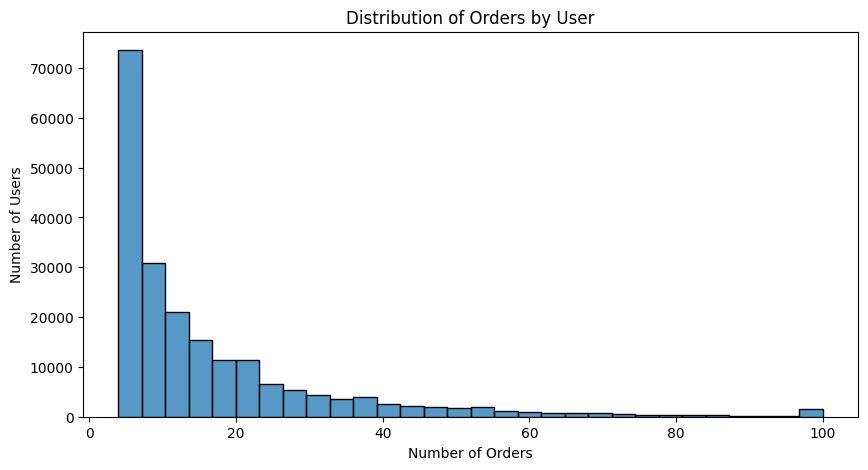

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

user_order_counts = orders['user_id'].value_counts()

plt.figure(figsize=(10, 5))
sns.histplot(user_order_counts, bins=30)
plt.title('Distribution of Orders by User')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Users')
plt.show()


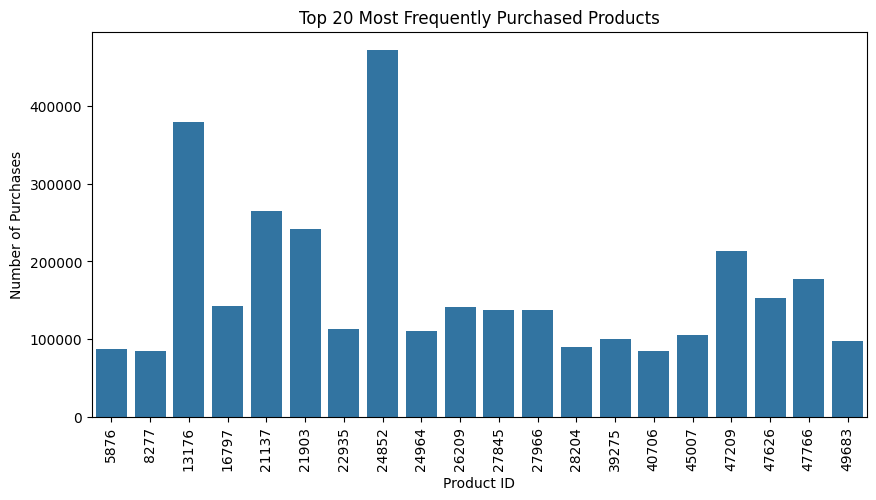

In [20]:
product_counts = order_products_prior['product_id'].value_counts().nlargest(20)

plt.figure(figsize=(10, 5))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.title('Top 20 Most Frequently Purchased Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=90)
plt.show()


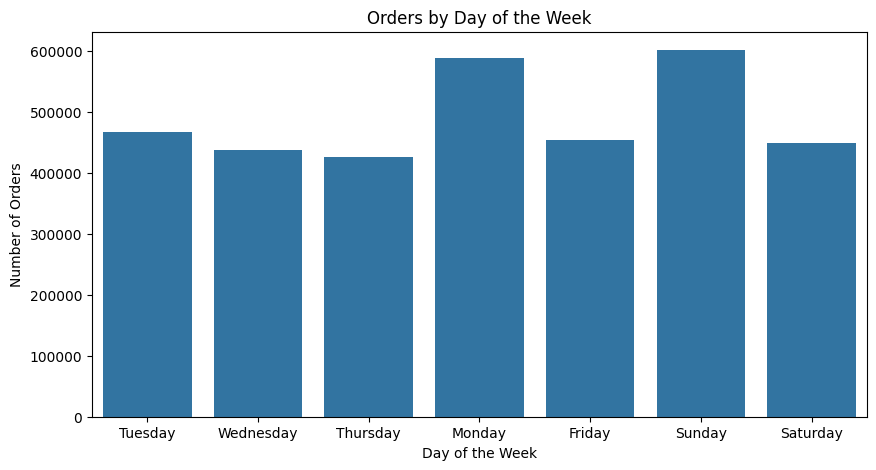

In [21]:
# Add day of the week names for better readability
orders['order_dow'] = orders['order_dow'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday',
                                                3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

plt.figure(figsize=(10, 5))
sns.countplot(data=orders, x='order_dow')
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()


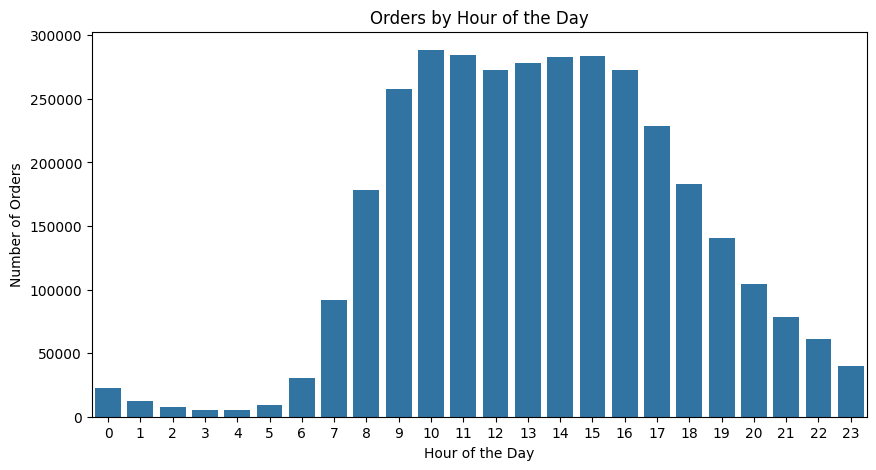

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(data=orders, x='order_hou')
plt.title('Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()


Average Basket Size: 10.09 items per order


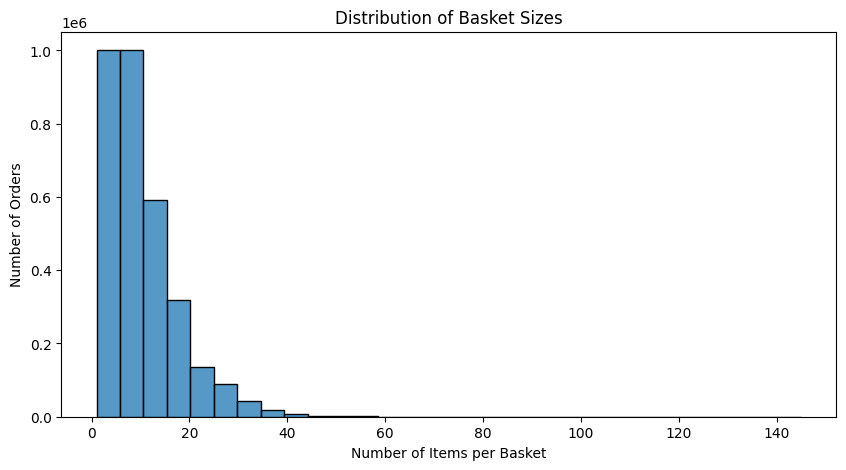

In [38]:
average_basket_size = order_products_prior.groupby('order_id')['product_id'].count().mean()
print(f'Average Basket Size: {average_basket_size:.2f} items per order')

# Visualize average basket size
plt.figure(figsize=(10, 5))
sns.histplot(order_products_prior.groupby('order_id')['product_id'].count(), bins=30)
plt.title('Distribution of Basket Sizes')
plt.xlabel('Number of Items per Basket')
plt.ylabel('Number of Orders')
plt.show()


NameError: name 'merged_data' is not defined

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [46]:
# Step 1: Load the datasets from Instacart
orders = pd.read_csv('orders.csv')  # Adjust the path as necessary
products = pd.read_csv('products.csv')  # Adjust the path as necessary
order_products_prior = pd.read_csv('order_products__prior.csv')  # Adjust the path as necessary


In [47]:
# Step 2: Data preparation and feature engineering
# Combine datasets to create a complete view
combined = order_products_prior.merge(orders[['order_id', 'user_id']], on='order_id', how='left')

In [48]:
# Create a binary target variable indicating if a product was purchased (1) or not (0)
purchase_counts = combined.groupby(['user_id', 'product_id'])['order_id'].count().reset_index()
purchase_counts.columns = ['user_id', 'product_id', 'purchase_count']

In [49]:
# Merge back to the combined dataset
combined = combined.merge(purchase_counts, on=['user_id', 'product_id'], how='left')

In [50]:
# Create the binary target variable (1 if purchased, 0 otherwise)
combined['target'] = np.where(combined['purchase_count'] > 0, 1, 0)

In [51]:
# Drop unnecessary columns and duplicates to create features_df
features_df = combined[['user_id', 'product_id', 'target', 'purchase_count']].drop_duplicates()


In [52]:
# Step 3: Prepare features (X) and target (y)
X = features_df[['purchase_count']]  # Using 'purchase_count' as an example feature
y = features_df['target']

In [53]:
# Check the shapes of X and y
print("Features X shape: ", X.shape)
print("Target y shape: ", y.shape)

Features X shape:  (13307953, 1)
Target y shape:  (13307953,)


In [62]:
# Step 4: Define the parameter grid for Randomized Search
param_grid = {
    'n_estimators': [10, 20, 30],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],     # Depth of trees
    'min_samples_split': [2, 5, 10],     # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],       # Minimum samples at a leaf node
    'bootstrap': [True, False]            # Whether to use bootstrap samples
}


In [63]:

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [64]:
# Step 5: Perform Randomized Search for optimal parameters
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_grid,
                                   n_iter=10,  # Number of different combinations to try
                                   cv=3,        # Cross-validation strategy
                                   n_jobs=-1,   # Use all available cores
                                   verbose=2,   # Verbosity level
                                   scoring='accuracy',  # Assessment metric
                                   random_state=42)

In [ ]:
# Fit the model with the sampled data
random_search.fit(X, y)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
# Output the best parameters found
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

In [ ]:
# Step 6: Train the optimized Random Forest model with the best parameters
final_rf_model = RandomForestClassifier(**best_params, random_state=42)
final_rf_model.fit(X, y)

In [ ]:

# Predictions on the same dataset (for demonstration; ideally, you'd use a test set)
y_pred = final_rf_model.predict(X)

In [ ]:
# Step 7: Print the Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

In [ ]:
# Step 8: Print the Classification Report
print("\nClassification Report:")
print(classification_report(y, y_pred))

In [ ]:
# Step 9: Feature Importance
importances = final_rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [ ]:

print("Random Forest Feature Importances:")
print(importance_df)

# List of important features
important_features = importance_df[importance_df['Importance'] > 0]  # You can adjust this threshold
print("\nList of Important Features with Their Importances:")
print(important_features)

In [ ]:
# Visualize the Random Forest feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x